In [20]:
library(data.table)
library(zoo)
library(forecast)
library(dplyr)  
library(readr)

In [21]:
train <- read_csv("./dataset/train.csv", col_types=list(
  Store = col_integer(),
  DayOfWeek= col_integer(),
  Date = col_date(),
  Sales = col_integer(),
  Customers = col_integer(),
  Open = col_integer(),
  Promo = col_integer(),
  StateHoliday = col_character(),
  SchoolHoliday = col_integer()))

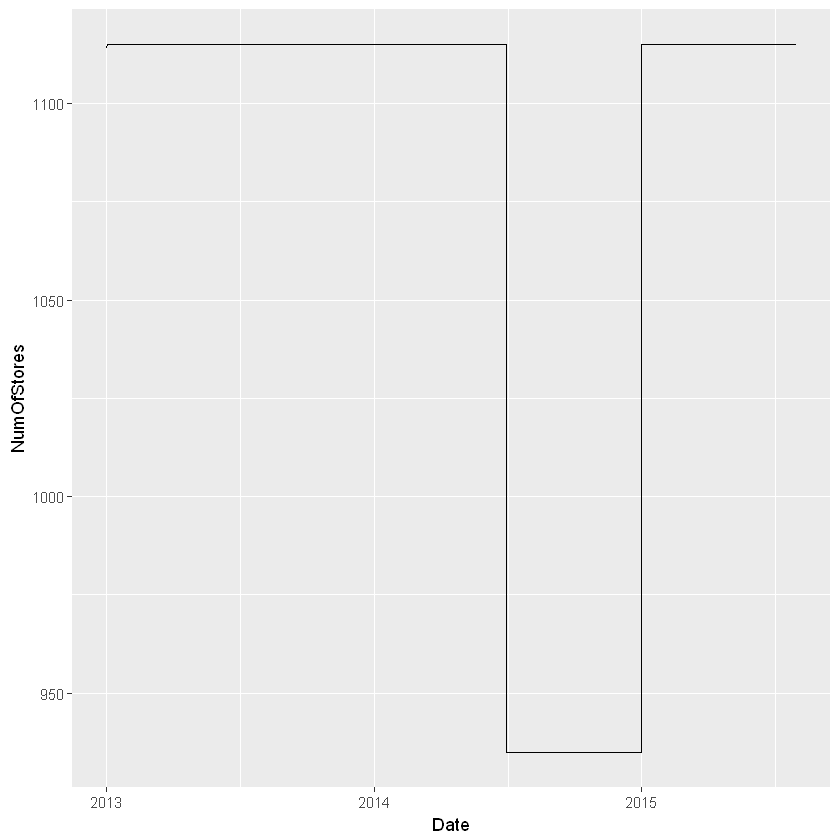

In [24]:
by_Date <- train %>% group_by(Date) %>% summarise(NumOfStores=n())
ggplot(by_Date, aes(Date,NumOfStores)) + geom_line()

In [5]:
library(ggplot2)
test <- fread("./dataset/test.csv")
train <- fread("./dataset/train.csv")
store <- fread("./dataset/store.csv")

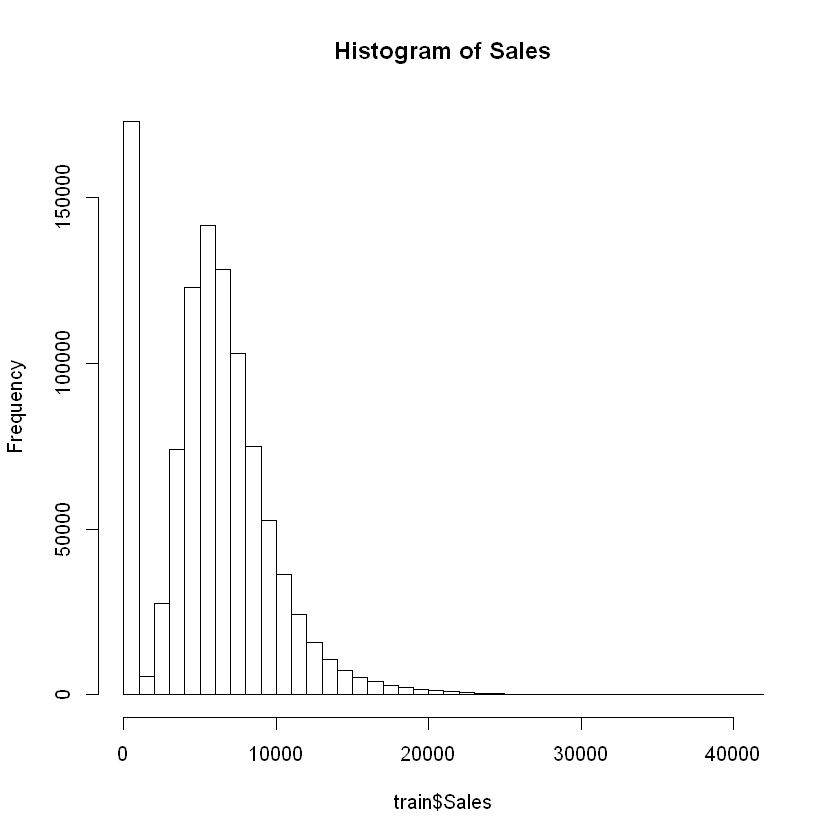

In [36]:
hist(train$Sales, 50, main="Histogram of Sales")

In [45]:
train[Sales != 0]

ERROR: Error in `[.tbl_df`(train, Sales != 0, ): 找不到对象'Sales'


In [40]:
hist(aggregate(train[Sales != 0]$Sales, by = list(train[Sales != 0]$Store), mean)$x, 100, main = "Mean sales per store when store was not closed")

ERROR: Error in check_names_df(i, x): 找不到对象'Sales'


Classes 'tbl_df', 'tbl' and 'data.frame':	1017209 obs. of  9 variables:
 $ Store        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek    : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Date         : Date, format: "2015-07-31" "2015-07-31" ...
 $ Sales        : int  5263 6064 8314 13995 4822 5651 15344 8492 8565 7185 ...
 $ Customers    : int  555 625 821 1498 559 589 1414 833 687 681 ...
 $ Open         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Promo        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ StateHoliday : chr  "0" "0" "0" "0" ...
 $ SchoolHoliday: int  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 9
  .. ..$ Store        : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ DayOfWeek    : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ Date         :List of 1
  .. .. ..$ format: chr ""
  .. .. ..- attr(*, "class")= chr  "collector_date" "collector"
  .. ..$ Sales        : list()
  .. .. ..- attr(*, "class")= chr  

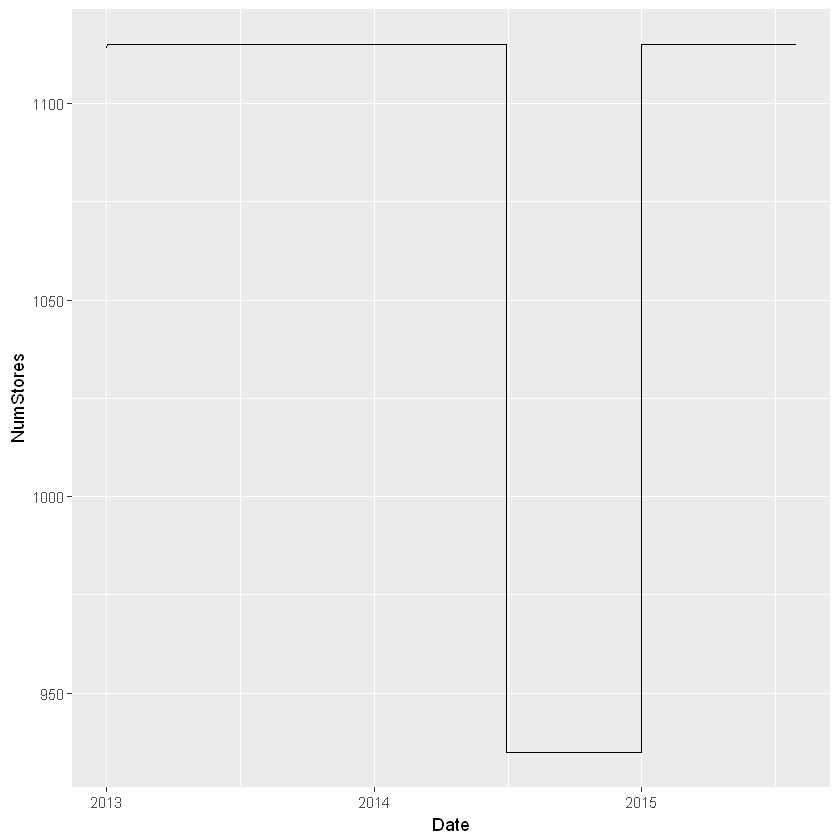

In [37]:
str(train)
by_Date <- train %>% group_by(Date) %>% summarise(NumStores=n())
ggplot(by_Date, aes(x=Date,y=NumStores,group = 1)) + geom_line()

In [7]:
str(test)

Classes 'data.table' and 'data.frame':	41088 obs. of  8 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Store        : int  1 3 7 8 9 10 11 12 13 14 ...
 $ DayOfWeek    : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Date         : chr  "2015-09-17" "2015-09-17" "2015-09-17" "2015-09-17" ...
 $ Open         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Promo        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ StateHoliday : chr  "0" "0" "0" "0" ...
 $ SchoolHoliday: int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [8]:
str(store)

Classes 'data.table' and 'data.frame':	1115 obs. of  10 variables:
 $ Store                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ StoreType                : chr  "c" "a" "a" "c" ...
 $ Assortment               : chr  "a" "a" "a" "c" ...
 $ CompetitionDistance      : int  1270 570 14130 620 29910 310 24000 7520 2030 3160 ...
 $ CompetitionOpenSinceMonth: int  9 11 12 9 4 12 4 10 8 9 ...
 $ CompetitionOpenSinceYear : int  2008 2007 2006 2009 2015 2013 2013 2014 2000 2009 ...
 $ Promo2                   : int  0 1 1 0 0 0 0 0 0 0 ...
 $ Promo2SinceWeek          : int  NA 13 14 NA NA NA NA NA NA NA ...
 $ Promo2SinceYear          : int  NA 2010 2011 NA NA NA NA NA NA NA ...
 $ PromoInterval            : chr  "" "Jan,Apr,Jul,Oct" "Jan,Apr,Jul,Oct" "" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [15]:
head(test)

Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
40233,1,6,2015-08-01,1,0,0,1
40234,3,6,2015-08-01,1,0,0,0
40235,7,6,2015-08-01,1,0,0,0
40236,8,6,2015-08-01,1,0,0,0
40237,9,6,2015-08-01,1,0,0,0
40238,10,6,2015-08-01,1,0,0,1


In [10]:
train[, Date := as.Date(Date)]
head(train)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1
6,5,2015-07-31,5651,589,1,1,0,1


In [13]:
head(store)

Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,c,a,1270,9,2008,0,NA,NA,
2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
4,c,c,620,9,2009,0,NA,NA,
5,a,a,29910,4,2015,0,NA,NA,
6,a,a,310,12,2013,0,NA,NA,


In [14]:
train <- train[order(Date)]
test <- test[order(Date)]
summary(train)
summary(test)
summary(store)
# head(train)

     Store          DayOfWeek          Date                Sales      
 Min.   :   1.0   Min.   :1.000   Min.   :2013-01-01   Min.   :    0  
 1st Qu.: 280.0   1st Qu.:2.000   1st Qu.:2013-08-17   1st Qu.: 3727  
 Median : 558.0   Median :4.000   Median :2014-04-02   Median : 5744  
 Mean   : 558.4   Mean   :3.998   Mean   :2014-04-11   Mean   : 5774  
 3rd Qu.: 838.0   3rd Qu.:6.000   3rd Qu.:2014-12-12   3rd Qu.: 7856  
 Max.   :1115.0   Max.   :7.000   Max.   :2015-07-31   Max.   :41551  
   Customers           Open            Promo        StateHoliday      
 Min.   :   0.0   Min.   :0.0000   Min.   :0.0000   Length:1017209    
 1st Qu.: 405.0   1st Qu.:1.0000   1st Qu.:0.0000   Class :character  
 Median : 609.0   Median :1.0000   Median :0.0000   Mode  :character  
 Mean   : 633.1   Mean   :0.8301   Mean   :0.3815                     
 3rd Qu.: 837.0   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :7388.0   Max.   :1.0000   Max.   :1.0000                     
 Schoo

       Id            Store          DayOfWeek         Date          
 Min.   :    1   Min.   :   1.0   Min.   :1.000   Length:41088      
 1st Qu.:10273   1st Qu.: 279.8   1st Qu.:2.000   Class :character  
 Median :20545   Median : 553.5   Median :4.000   Mode  :character  
 Mean   :20545   Mean   : 555.9   Mean   :3.979                     
 3rd Qu.:30816   3rd Qu.: 832.2   3rd Qu.:6.000                     
 Max.   :41088   Max.   :1115.0   Max.   :7.000                     
                                                                    
      Open            Promo        StateHoliday       SchoolHoliday   
 Min.   :0.0000   Min.   :0.0000   Length:41088       Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   Class :character   1st Qu.:0.0000  
 Median :1.0000   Median :0.0000   Mode  :character   Median :0.0000  
 Mean   :0.8543   Mean   :0.3958                      Mean   :0.4435  
 3rd Qu.:1.0000   3rd Qu.:1.0000                      3rd Qu.:1.0000  
 Max.   :1.0000   Max.

     Store         StoreType          Assortment        CompetitionDistance
 Min.   :   1.0   Length:1115        Length:1115        Min.   :   20.0    
 1st Qu.: 279.5   Class :character   Class :character   1st Qu.:  717.5    
 Median : 558.0   Mode  :character   Mode  :character   Median : 2325.0    
 Mean   : 558.0                                         Mean   : 5404.9    
 3rd Qu.: 836.5                                         3rd Qu.: 6882.5    
 Max.   :1115.0                                         Max.   :75860.0    
                                                        NA's   :3          
 CompetitionOpenSinceMonth CompetitionOpenSinceYear     Promo2      
 Min.   : 1.000            Min.   :1900             Min.   :0.0000  
 1st Qu.: 4.000            1st Qu.:2006             1st Qu.:0.0000  
 Median : 8.000            Median :2010             Median :1.0000  
 Mean   : 7.225            Mean   :2009             Mean   :0.5121  
 3rd Qu.:10.000            3rd Qu.:2013        

In [12]:
test[is.na(test$Open), ]

Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
10752,622,6,2015-09-05,NA,0,0,0
9040,622,1,2015-09-07,NA,0,0,0
8184,622,2,2015-09-08,NA,0,0,0
7328,622,3,2015-09-09,NA,0,0,0
6472,622,4,2015-09-10,NA,0,0,0
5616,622,5,2015-09-11,NA,0,0,0
4760,622,6,2015-09-12,NA,0,0,0
3048,622,1,2015-09-14,NA,1,0,0
2192,622,2,2015-09-15,NA,1,0,0
1336,622,3,2015-09-16,NA,1,0,0


In [24]:
test$Open[test$Store == 622]

[1]  1  0  1  1  1  1  1  1  0  1  1  1  1  1  1  0  1  1  1  1  1  1  0  1  1
[26]  1  1  1  1  0  1  1  1  1  1 NA  0 NA NA NA NA NA NA  0 NA NA NA NA

In [26]:
test[is.na(test)] <- 1

In [27]:
test$Open[test$Store == 622]

[1] 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
[39] 1 1 1 1 1 0 1 1 1 1

In [43]:
by_Date <- train %>% group_by(Date) %>% summarise(NumStores=n())
ggplot(by_Date, aes(Date,NumStores)) + geom_line()

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): 无法启动png()装置


plot without title